In [1]:
import numpy as np, matplotlib.pyplot as plt, scipy.sparse as ss
%matplotlib inline

## Load data

In [2]:
# Load coordinates for all cells 
xx,yy = np.load('coordinates_x.npy'),np.load('coordinates_y.npy') 

# Load the mask that corresponds to just the neutrophil/mono trajectory
neu_mo_mask = np.load('neutrophil_monocyte_trajectory_mask.npy')

# Load an array with the time point for each cell (day 2, day 4, or day 6)
timepoints = np.load('timepoints.npy')

# Load a matrix of clonal fates. Each row corresponds to a day 2 cell, each column corresponds to a fate
# The value in each entry is the number of day 4/6 sisters of the day 2 in the particular fate
# The columns correspond to: Er, Mk, Ma, Ba, Eos, Neu, Mo, MigDC, pDC, Ly
clonal_fate_matrix = np.load('clonal_fate_matrix.npy')

# Load the predictions from each algorithm. Each set of predictions is a vector of length 20157
# The length is determined by the intersection of neu/mo trajectory cells and day 2 cells
PBA_predictions = np.load('PBA_predictions.npy')
FateID_predictions = np.load('FateID_predictions.npy')
WOT_predictions = np.load('WOT_predictions.npy')

# In order to recirulate the figure, we also need to load a mask that corresponds to early (Cd34+ cells)
# The mask has length 28249, which is equal to the total number of day 2 cells
early_cells = np.load('early_cells.npy')

# In the figure, we compare the accuracy of fate prediction to a clonal benchmark determined by
# the values of heldout clonal data. Here we load the heldout mask and the smoothed 'groundtruth'
# Both arrays have length 20157, which is the intersection of neu/mo cells and day 2 cells
heldout_mask = np.load('heldout_mask.npy')
smoothed_groundtruth = np.load('smoothed_groundtruth_from_heldout.npy')

# Finally, to exactly reproduce the figure, we need to load a mask which excludes outlier cells
# in the SPRING plot, and was used to make the visualization more clear.
# This array also has length 20157 and has 2% positive values (i.e. 2% of cells are excluded)
outlier_mask = np.load('outliers_in_SPRING_plot.npy')



### Figure 5a (not excluding outliers in 2D)

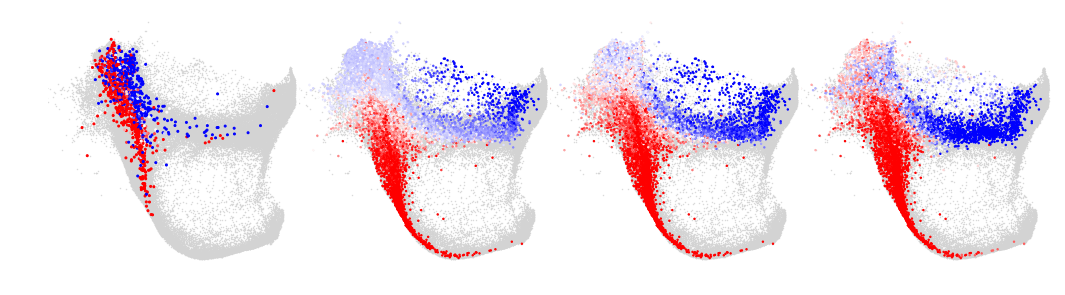

In [3]:
# First, let's define an array that corresponds to the clonal output of single cells
# represented as the percent of neu vs. mo output. Not all cells have detected
# clonal output, so we will also generate a mask at this step. 
# Note, we want to restrict to day 2 cells in the neu/mo trajectory, which will also be accomplished by the mask

has_fate_mask = np.all([clonal_fate_matrix[:,5:7].sum(1) > 0, neu_mo_mask[timepoints==2]],axis=0)
neu_vs_mo_percent = clonal_fate_matrix[has_fate_mask,5] / clonal_fate_matrix[has_fate_mask,5:7].sum(1)

# Now we can plot everything
fig,axs = plt.subplots(1,4)
for i in range(4):
    axs[i].axis('off')
    axs[i].set_xlim([-1000,3100])
    axs[i].scatter(xx[neu_mo_mask],yy[neu_mo_mask], c='lightgray', s=.2)


axs[0].scatter(xx[timepoints==2][has_fate_mask],yy[timepoints==2][has_fate_mask], 
                c=neu_vs_mo_percent, s=4,cmap=plt.cm.bwr, vmin=0, vmax=1)

# Let's make a mask that corresponds to the interesection of day 2 and neu/mo cells
day2_neu_mo = np.all([neu_mo_mask, timepoints==2],axis=0)

axs[1].scatter(xx[day2_neu_mo],yy[day2_neu_mo],
               c=PBA_predictions, s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

axs[2].scatter(xx[day2_neu_mo],yy[day2_neu_mo],
               c=WOT_predictions, s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

axs[3].scatter(xx[day2_neu_mo],yy[day2_neu_mo],
               c=FateID_predictions, s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

fig.set_size_inches((18,4.8))
fig.subplots_adjust(wspace=0)

### Figure 5a (yes excluding outliers in 2D)

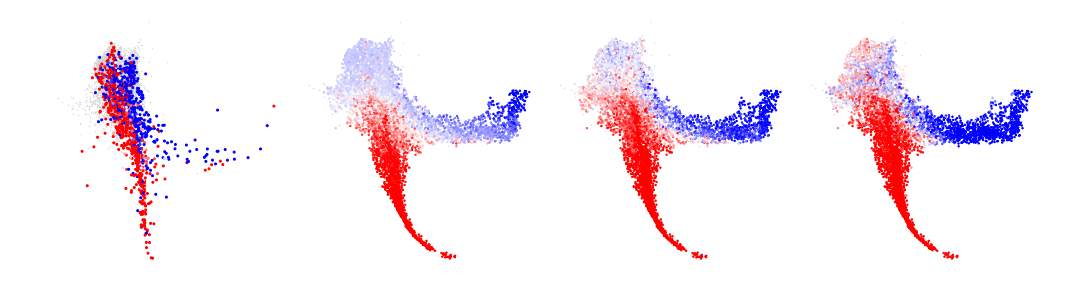

In [4]:
fig,axs = plt.subplots(1,4)
for i in range(4):
    axs[i].axis('off')
    axs[i].set_xlim([-1000,3100])
    axs[i].scatter(xx[timepoints==2][np.all([neu_mo_mask[timepoints==2],early_cells],axis=0)],
                   yy[timepoints==2][np.all([neu_mo_mask[timepoints==2],early_cells],axis=0)], c='lightgray', s=.2)

axs[0].scatter(xx[timepoints==2][has_fate_mask],yy[timepoints==2][has_fate_mask], 
                c=neu_vs_mo_percent, s=4,cmap=plt.cm.bwr, vmin=0, vmax=1)

axs[1].scatter(xx[day2_neu_mo][~outlier_mask],yy[day2_neu_mo][~outlier_mask],
               c=PBA_predictions[~outlier_mask], s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

axs[2].scatter(xx[day2_neu_mo][~outlier_mask],yy[day2_neu_mo][~outlier_mask],
               c=WOT_predictions[~outlier_mask], s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

axs[3].scatter(xx[day2_neu_mo][~outlier_mask],yy[day2_neu_mo][~outlier_mask],
               c=FateID_predictions[~outlier_mask], s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

fig.set_size_inches((18,4.8))
fig.subplots_adjust(wspace=0)

### Fig 5c

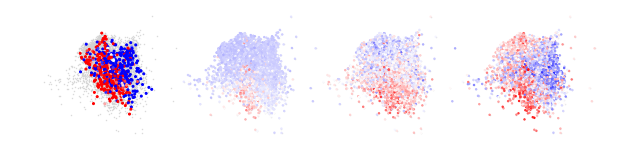

In [5]:
# lets make a mask that corresponds to early cells that are on the mo/nue trajectory
early_mo_neu_mask = np.all([early_cells, neu_mo_mask[timepoints==2]],axis=0)

fig,axs = plt.subplots(1,4)
for i in range(4):
    axs[i].axis('off')
    axs[i].set_xlim([-700,1000])
    axs[i].scatter(xx[timepoints==2][early_mo_neu_mask],
                   yy[timepoints==2][early_mo_neu_mask], c='lightgray', s=.2)


axs[0].scatter(xx[timepoints==2][np.all([has_fate_mask,early_cells],axis=0)],
               yy[timepoints==2][np.all([has_fate_mask,early_cells],axis=0)],
               c=neu_vs_mo_percent[early_cells[[has_fate_mask]]], s=4,cmap=plt.cm.bwr, vmin=0, vmax=1)


axs[1].scatter(xx[timepoints==2][early_mo_neu_mask],yy[timepoints==2][early_mo_neu_mask],
               c=PBA_predictions[early_cells[neu_mo_mask[timepoints==2]]], s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)


axs[2].scatter(xx[timepoints==2][early_mo_neu_mask],yy[timepoints==2][early_mo_neu_mask],
               c=WOT_predictions[early_cells[neu_mo_mask[timepoints==2]]], s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

axs[3].scatter(xx[timepoints==2][early_mo_neu_mask],yy[timepoints==2][early_mo_neu_mask],
               c=FateID_predictions[early_cells[neu_mo_mask[timepoints==2]]], s=2, cmap=plt.cm.bwr, vmin=0.1, vmax=0.9)

fig.set_size_inches((10,2.4))
fig.subplots_adjust(wspace=0)

### Figure 5d

In [6]:
# Here we are going to compare each prediction method to the clonal data
# As an upper bound or positive control, we'll use smoothed clonal scores computed from heldout data

# Make a list of predictions, restricted to early cells, and excluding heldout data
predictions = []

# append smoothed clonal predictions
predictions.append(smoothed_groundtruth[np.all([early_cells[neu_mo_mask[timepoints==2]], ~heldout_mask],axis=0)])

# append each of the fate prediction methods..
# again we'll need to exclude heldout clonal data for a fair comparison

heldout_mask_for_early_cells = (~heldout_mask)[early_cells[neu_mo_mask[timepoints==2]]]

predictions.append(PBA_predictions[early_cells[neu_mo_mask[timepoints==2]]][heldout_mask_for_early_cells])
predictions.append(WOT_predictions[early_cells[neu_mo_mask[timepoints==2]]][heldout_mask_for_early_cells])
predictions.append(FateID_predictions[early_cells[neu_mo_mask[timepoints==2]]][heldout_mask_for_early_cells])

# NOTE: each array in predictions has length 5511. This is the number of cells from day 2, in the neu/mo
# trajectory that are "early cells" and not among the heldout data

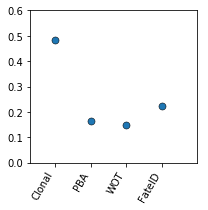

In [7]:
# Now we can plot the correlation of each prediction to the clonal data
# we need to exclude cells tht were part of the heldoout data
# we also need to mask a mask for just the cells with a clonal fate,
# since most cells do not belong to a clone that was observed on day 4 or 6

clonal_data_no_heldout = neu_vs_mo_percent[np.all([early_cells[neu_mo_mask[timepoints==2]], ~heldout_mask],axis=0)[has_fate_mask[neu_mo_mask[timepoints==2]]]]

has_fate_mask_for_early_heldout = has_fate_mask[np.all([neu_mo_mask[timepoints==2],early_cells],axis=0)][heldout_mask_for_early_cells]
predictions_filtered = [pred[has_fate_mask_for_early_heldout] for pred in predictions]

from scipy.stats import pearsonr
correlations = [pearsonr(pred,clonal_data_no_heldout)[0] for pred in predictions_filtered]
plt.scatter(np.arange(len(correlations)), correlations, s=50, edgecolor='k', linewidth=0.5)

plt.ylim([0, .6])
plt.xlim([-.7,4])
plt.gcf().set_size_inches((3,2.8))
plt.xticks(range(len(correlations)),['Clonal','PBA','WOT','FateID'], rotation=60, ha='right') ;

In [8]:
ps = []
rs = []
fcs = []



EE_tmp = EE[bm_ff[mpp_ff[GM_mask[tps_flat==2]]],:]
bm_p_tmp = bm_p[mpp_ff[GM_mask[tps_flat==2]][bm_ff]]

for i in range(len(gf)):
    #t,p = ttest_ind(EE_tmp[bm_p_tmp>.5,i], EE_tmp[bm_p_tmp<.5,i])
    r,p = pearsonr(EE[:,i][bm_ff[mpp_ff[GM_mask[tps_flat==2]]]],bm_p[mpp_ff[GM_mask[tps_flat==2]][bm_ff]])
    if np.isnan(r) or np.isnan(p):
        r = 0; p = 1
    ps.append(p)
    rs.append(r)
    #fcs.append(np.log(EE_tmp[bm_p_tmp>.5,i].mean()+.00001) - np.log(EE_tmp[bm_p_tmp<.5,i].mean()+.00001))

NameError: name 'EE' is not defined